<a href="https://colab.research.google.com/github/Lfirenzeg/msds620/blob/main/Week%204/%20620_LFMG_High_Frequency_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 620
# Assignment – High Frequency Words

### By Luis Munoz Grass

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Solution

For this assignment we'll use the NLTK Corpora library. One particular corpus that caught my attention was C-Span Inaugural Address Corpus.

For this assignment I chose the speech of President Obama, for his 2013 inauguration.

Compared to general corpora, inaugural speeches are highly formal, focused on political themes, and we can anticipate it will show concentrated repetition of specific high-frequency words (such as "America", "nation", "freedom", etc). We would also expect fewer colloquialisms and less vocabulary diversity, but strong repetition of specific topics, especially in the top ranked words.


In [2]:
import nltk
from nltk import FreqDist
nltk.download('inaugural')
nltk.download('punkt')  # for tokenization


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
from nltk.corpus import inaugural
from nltk import FreqDist, word_tokenize

# loading chosen speech
text = inaugural.raw('2013-Obama.txt')

# tokenizing everything
tokens = word_tokenize(text)

# we can try to preview the first couple of words to make sure it loaded correctly
print(tokens[:20])



['Thank', 'you', '.', 'Thank', 'you', 'so', 'much', '.', 'Vice', 'President', 'Biden', ',', 'Mr.', 'Chief', 'Justice', ',', 'Members', 'of', 'the', 'United']


### Unique Words
For this count we will include all distinct tokens after tokenization, we will make sure to exclude punctuation and not double count capitalized variants.

In [5]:
# we'll normalize tokens setting everything to lowercase and filtering out non alphabetic symbols
words = [word.lower() for word in tokens if word.isalpha()]

# Get total unique words and total words
unique_words = set(words)
print(f"Total words (after cleaning): {len(words)}")
print(f"Total unique words: {len(unique_words)}")


Total words (after cleaning): 2068
Total unique words: 754


Out of 2068 total words (after removing punctuation and numbers), there are 754 unique words. This means that about a little over a third of the vocabulary is non-repeating. So, while many words are reused (as expected in public speeches), the speaker still employed a rich and varied vocabulary to convey key ideas.

## Most Common Words

In [6]:
# frequency distribution function
fdist = FreqDist(words)

# total number of words
total_count = len(words)

# function to find how many unique words represent 50% of total words
cumulative = 0
top_words = []
for word, freq in fdist.most_common():
    cumulative += freq
    top_words.append(word)
    if cumulative >= total_count / 2:
        break


print(f"{len(top_words)} unique words represent 50% of the total words.")
print("These words are:", top_words)



48 unique words represent 50% of the total words.
These words are: ['the', 'and', 'our', 'of', 'we', 'to', 'that', 'a', 'for', 'not', 'is', 'us', 'in', 'are', 'will', 'must', 'this', 'or', 'with', 'can', 'but', 'all', 'as', 'by', 'those', 'it', 'people', 'these', 'be', 'they', 'from', 'time', 'have', 'do', 'america', 'who', 'you', 'what', 'together', 'an', 'more', 'on', 'when', 'country', 'make', 'every', 'so', 'citizens']


This one property of natural language, since a small subset of words accounts for a disproportionately large portion of text. In this case, just 48 unique words, with many of them being common function words like "the", "and", "we", and "to" make up half of the entire inaugural speech. We can already see how this aligns with the principles of Zipf's Law.

As a different analysis, we can see that the mix of pronouns (we, our, us), modal verbs (must, will, can), and unifying terms (together, citizens, America) also reflects the inclusive tone and forward looking style of president Obama.

In [7]:
top_20 = fdist.most_common(20)
print("Top 20 most frequent words:")
for word, count in top_20:
    print(f"{word}: {count}")


Top 20 most frequent words:
the: 104
and: 88
our: 75
of: 69
we: 69
to: 65
that: 56
a: 37
for: 27
not: 26
is: 23
us: 21
in: 21
are: 21
will: 20
must: 17
this: 13
or: 13
with: 13
can: 13


## Plot: Frequency of Top 200 Words

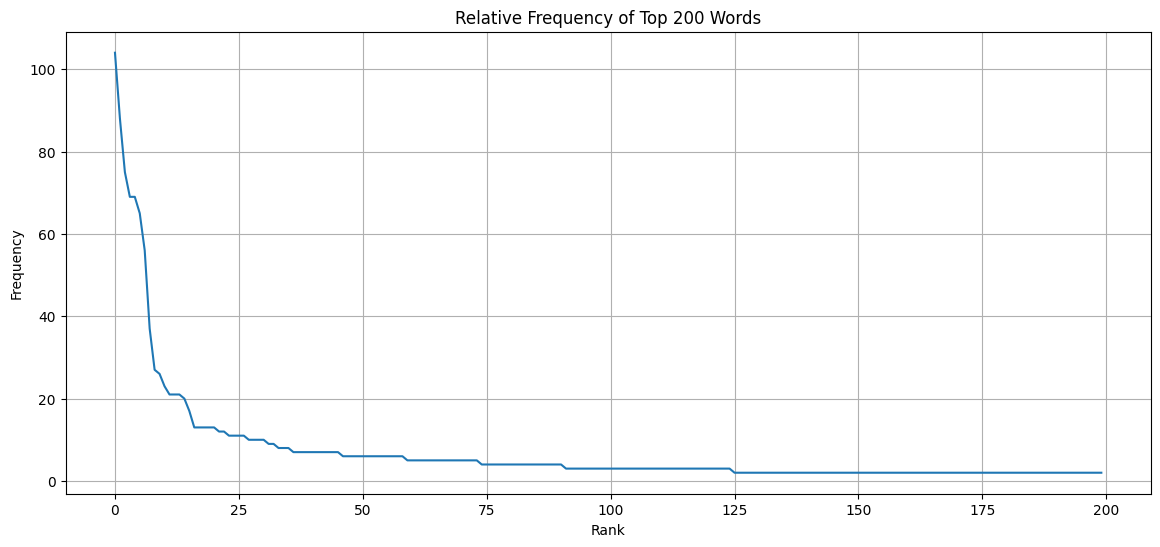

In [10]:
import matplotlib.pyplot as plt

# top 200 words
top_200 = fdist.most_common(200)

# plotting
words_200 = [word for word, freq in top_200]
freqs_200 = [freq for word, freq in top_200]

plt.figure(figsize=(14, 6))
plt.plot(freqs_200)
plt.title("Relative Frequency of Top 200 Words")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


The plot shows  a sharp drop from the most frequent word, confirming our earlier observation that a handful of words appear far more often than others. The curve flattens significant after rank 25 and seems to remain flatten after rank 125.

## Plot: Zipf's Law Demonstration

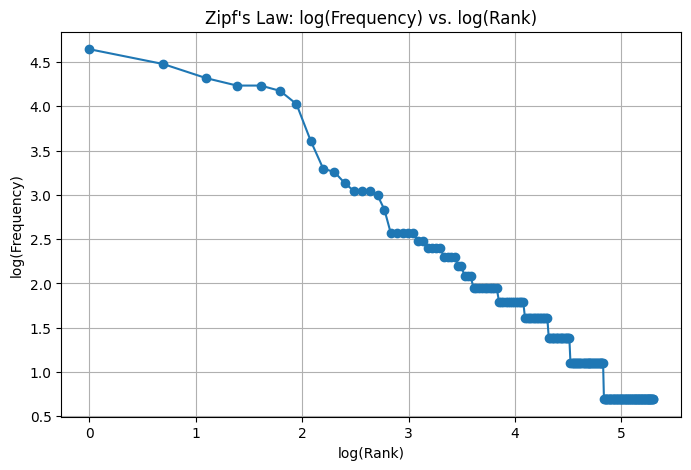

In [11]:
import numpy as np

ranks = np.arange(1, 201)
log_ranks = np.log(ranks)
log_freqs = np.log(freqs_200)

plt.figure(figsize=(8, 5))
plt.plot(log_ranks, log_freqs, marker='o')
plt.title("Zipf's Law: log(Frequency) vs. log(Rank)")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.grid(True)
plt.show()


We can see a nearly-linear trend in the log-log plot supporting Zipf's Law:  word frequency is inversely proportional to its rank. Although there's some deviation in the lower ranks, the overall pattern aligns with natural language behavior.

## Differences from all corpora

While the speech we analyzed follows Zipf's Law, the inaugural corpus overrepresents formal, political, and unifying language. Words like "freedom", nation", "citizens", "America", "together", and "must" appear more frequently here than they would in general speech or writing.

In contrast, general corpora (like news, fiction, or social media) would show higher frequencies of everyday vocabulary, idioms, slangs, and verbs describing a wider variety of actions and contexts.

We can also see the inaugural corpus as more rhetorical and persuasive, with frequent use of inclusive pronouns (we, our, us) and modal verbs (must, will, can) that emphasize vision and responsibility, which might be less common in typical corpora.